In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## File Operations

### Reading and plotting the data

In [2]:
dataframe = pd.read_csv("./grades.csv")

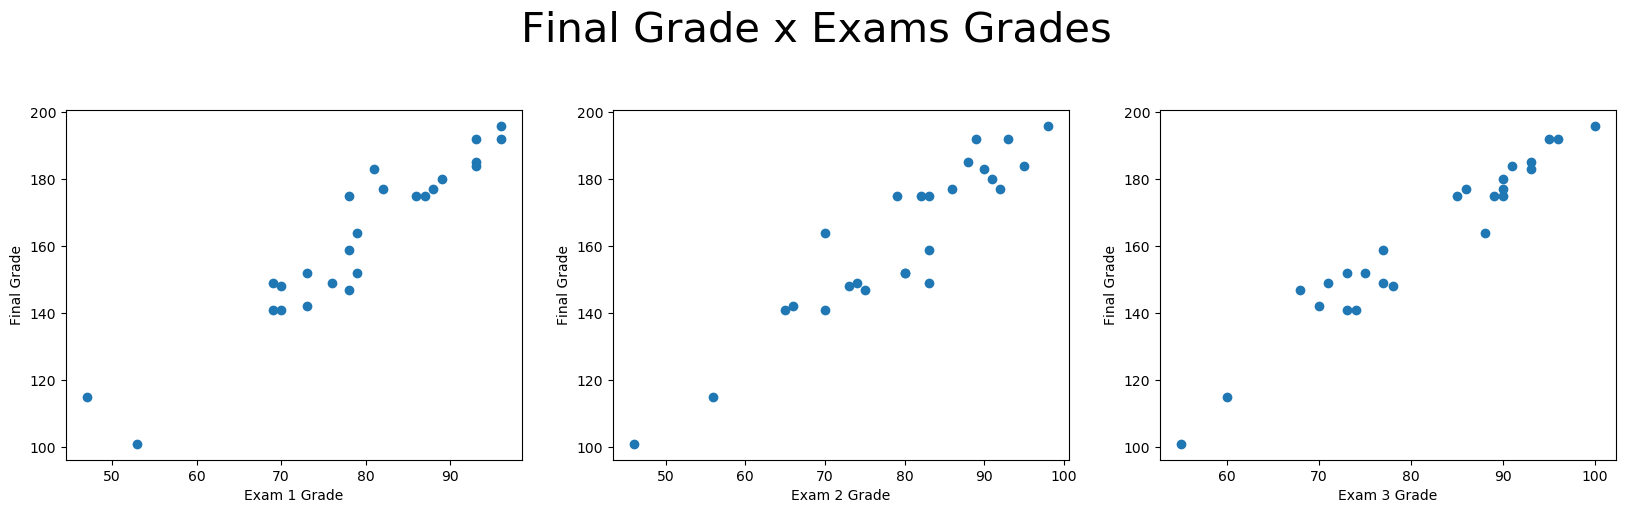

In [3]:

fig = plt.figure(figsize=(20, 10))
fig.suptitle("Final Grade x Exams Grades", size=30)

plt.subplot(2, 3, 1)
plt.scatter(dataframe.prova1.values, dataframe.final.values, cmap='bwr')
plt.ylabel("Final Grade")
plt.xlabel("Exam 1 Grade")

plt.subplot(2, 3, 2)
plt.scatter(dataframe.prova2.values, dataframe.final.values, cmap='bwr')
plt.ylabel("Final Grade")
plt.xlabel("Exam 2 Grade")

plt.subplot(2, 3, 3)
plt.scatter(dataframe.prova3.values, dataframe.final.values, cmap='bwr')
plt.ylabel("Final Grade")
plt.xlabel("Exam 3 Grade")

plt.show()

## Data normalization before implementation of Linear Regression

In [4]:
x = dataframe[['prova1', 'prova2', 'prova3']].values
y = dataframe['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [5]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0000000000000004


### Using SciKit Learn Linear Regression to compare with Perceptron LInear Regression

In [6]:
reg = LinearRegression()
reg.fit(x, y)

w_scikit = reg.coef_
b_scikit = reg.intercept_

print('w: ', w_scikit)
print('b: ', b_scikit)

w:  [ 8.72048636 14.1054877  26.26749487]
b:  150.65175754349872


### Perceptron LInear Regression

In [7]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 1e-2

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}. Cost: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0. Cost: 506750.7834135713
step 200. Cost: 175.76395583493698
step 400. Cost: 148.57858283675802
step 600. Cost: 146.42699042415558
step 800. Cost: 146.18444579926202
step 1000. Cost: 146.15467913293276
w:  [8.799223737624745, 14.093160725936107, 26.290845354082446]
b:  150.7070515848334


### Differences $| w^{perceptron}_i - w^{scikit}_i|$ and $|b^{perceptron} - b^{scikit}|$

In [8]:
print("|w_i - w_scikit| = %s" % (np.abs(w - w_scikit)))
print("|b - b_scikit| = %s" % (np.abs(b - b_scikit)))

|w_i - w_scikit| = [0.07873738 0.01232697 0.02335049]
|b - b_scikit| = 0.05529404133469029
